#### Imports

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pathlib import Path

### Load Data

In [2]:
assets_path = Path("../data/assets")
factors_path = Path("../data/factors")

returns = pd.read_csv(assets_path / "asset_returns.csv", index_col=0, parse_dates=True)
factors = pd.read_csv(factors_path / "ff3_daily_clean.csv", index_col=0, parse_dates=True)

#### Align Dates 

In [3]:
returns = returns.loc[factors.index.intersection(returns.index)]
factors = factors.loc[returns.index]

In [4]:
returns

,AAPL,AMZN,JNJ,JPM,KO,META,MSFT,PFE,TSLA,XOM
Date,,,,,,,,,,
2018-01-03,-0.000174,0.012775,0.009552,0.001019,-0.002196,0.017914,0.004654,0.007409,-0.010233,0.019640
2018-01-04,0.004645,0.004476,-0.000071,0.014326,0.014085,-0.001841,0.008802,0.002180,-0.008290,0.001384
2018-01-05,0.011385,0.016163,0.008253,-0.006419,-0.000217,0.013671,0.012398,0.001902,0.006230,-0.000806
2018-01-08,-0.003714,0.014425,0.001270,0.001477,-0.001519,0.007653,0.001021,-0.011123,0.062638,0.004496
2018-01-09,-0.000115,0.004676,0.015857,0.005069,0.005000,-0.002178,-0.000679,-0.001097,-0.008085,-0.004246
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.003065,0.000622,0.005538,0.003325,-0.002718,0.024947,-0.003092,0.013278,0.022657,0.004062
2024-12-24,0.011478,0.017729,0.003993,0.016444,0.007374,0.013170,0.009374,0.001123,0.073572,0.000941
2024-12-26,0.003176,-0.008732,-0.001851,0.003425,-0.004297,-0.007240,-0.002777,-0.006731,-0.017630,0.000846


In [5]:
factors

,Mkt-RF,SMB,HML,RF
Date,,,,
2018-01-03,0.0059,-0.0039,-0.0018,0.00006
2018-01-04,0.0042,-0.0026,0.0024,0.00006
2018-01-05,0.0066,-0.0036,-0.0026,0.00006
2018-01-08,0.0019,-0.0015,0.0004,0.00006
2018-01-09,0.0015,-0.0034,-0.0003,0.00006
...,...,...,...,...
2024-12-23,0.0061,-0.0070,-0.0019,0.00017
2024-12-24,0.0111,-0.0009,-0.0005,0.00017
2024-12-26,0.0002,0.0104,-0.0019,0.00017


#### Extract Risk-Free Rate of Returns

In [7]:
excess_returns = returns.sub(factors["RF"], axis=0)
excess_returns

,AAPL,AMZN,JNJ,JPM,KO,META,MSFT,PFE,TSLA,XOM
Date,,,,,,,,,,
2018-01-03,-0.000234,0.012715,0.009492,0.000959,-0.002256,0.017854,0.004594,0.007349,-0.010293,0.019580
2018-01-04,0.004585,0.004416,-0.000131,0.014266,0.014025,-0.001901,0.008742,0.002120,-0.008350,0.001324
2018-01-05,0.011325,0.016103,0.008193,-0.006479,-0.000277,0.013611,0.012338,0.001842,0.006170,-0.000866
2018-01-08,-0.003774,0.014365,0.001210,0.001417,-0.001579,0.007593,0.000961,-0.011183,0.062578,0.004436
2018-01-09,-0.000175,0.004616,0.015797,0.005009,0.004940,-0.002238,-0.000739,-0.001157,-0.008145,-0.004306
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.002895,0.000452,0.005368,0.003155,-0.002888,0.024777,-0.003262,0.013108,0.022487,0.003892
2024-12-24,0.011308,0.017559,0.003823,0.016274,0.007204,0.013000,0.009204,0.000953,0.073402,0.000771
2024-12-26,0.003006,-0.008902,-0.002021,0.003255,-0.004467,-0.007410,-0.002947,-0.006901,-0.017800,0.000676


### Fit CAPM and FF3 Model on each Asset

In [8]:
def fit_ols(y, X):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

In [9]:
results = {}

for ticker in excess_returns.columns:
    y = excess_returns[ticker]
    
    # CAPM (only Market factor)
    X_capm = factors[["Mkt-RF"]]
    capm_model = fit_ols(y, X_capm)
    
    # FF3 (Market + SMB + HML)
    X_ff3 = factors[["Mkt-RF", "SMB", "HML"]]
    ff3_model = fit_ols(y, X_ff3)
    
    results[ticker] = {
        "CAPM": capm_model,
        "FF3": ff3_model
    }

print(f"Fitted models for {len(results)} assets.")

Fitted models for 10 assets.


#### Model Performance & Comparison

In [10]:
r2_data = []

for ticker, models in results.items():
    r2_capm = models["CAPM"].rsquared_adj
    r2_ff3 = models["FF3"].rsquared_adj
    r2_data.append({"Ticker": ticker, "CAPM_R2": r2_capm, "FF3_R2": r2_ff3})

r2_df = pd.DataFrame(r2_data).set_index("Ticker")
r2_df

,CAPM_R2,FF3_R2
Ticker,,
AAPL,0.595785,0.649500
AMZN,0.450177,0.570504
JNJ,0.239117,0.301468
JPM,0.500623,0.742394
KO,0.318980,0.411092
META,0.379079,0.441873
MSFT,0.667859,0.767102
PFE,0.182123,0.210099
TSLA,0.253374,0.298089


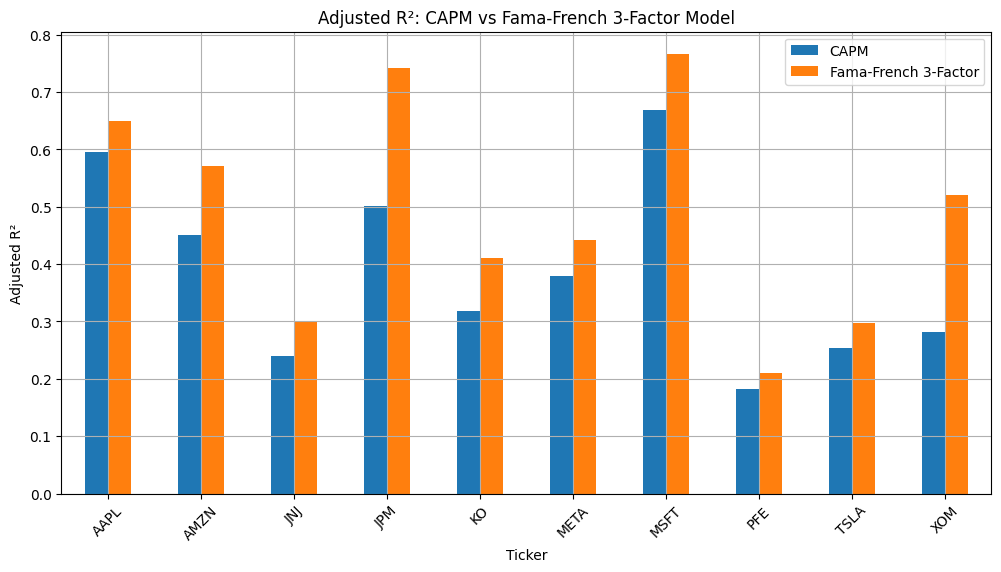

In [11]:
r2_df.plot(kind="bar", figsize=(12,6))
plt.title("Adjusted R²: CAPM vs Fama-French 3-Factor Model")
plt.ylabel("Adjusted R²")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(["CAPM", "Fama-French 3-Factor"])
plt.show()

#### Save Model Summaries

In [12]:
outputs_path = Path("../outputs")
outputs_path.mkdir(parents=True, exist_ok=True)

for ticker, models in results.items():
    with open(outputs_path / f"{ticker}_capm_summary.txt", "w") as f:
        f.write(str(models["CAPM"].summary()))
    with open(outputs_path / f"{ticker}_ff3_summary.txt", "w") as f:
        f.write(str(models["FF3"].summary()))

print(f"Saved model summaries to {outputs_path}")

Saved model summaries to ../outputs


In [24]:
import pickle
with open(outputs_path / 'model_results.pkl', 'wb') as handle:
    pickle.dump(results, handle)